In [44]:
import numpy as np
from scipy.stats import norm
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

## Using the desnity arguement to rescale a histogram

In [45]:
#  Draw a large number of samples from the normal distribution with mean = 0 and standard deviation equal to one.
samples =  np.random.normal(size = 500000)

#  Calculate the mean and standard deviation just to make sure our numbers make sense.
print('Mean = ', np.mean(samples) )
print('STD = ', np.std(samples))

Mean =  -0.0016675263211296588
STD =  0.9991336484969136


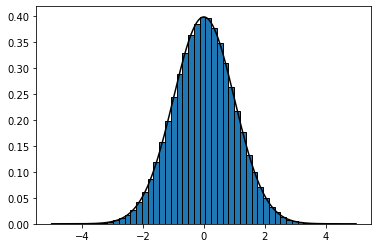

In [46]:
#  Create a histogram of our samples.  Use the density argument to normalize by the area under the curve
counts, bins, patches = plt.hist(samples, bins = 50, density = True, edgecolor = 'black')

#  Overlay a standard normal over the histogram
x = np.linspace(-5, 5, 10000)
y = norm.pdf(x)
plt.plot(x, y, 'k')

##  How to manually rescale a histrogram

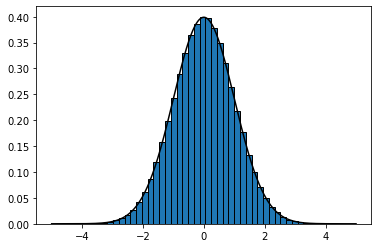

In [47]:
#  Create an unnormalized histogram
counts, bins, patches = plt.hist(samples, bins = 50, density = False, edgecolor = 'black')

#  The area of each rectangle is its height times its width
#  Use the diff command to calculate the widths.  The height is the counts
bin_widths = np.diff(bins)
area = np.sum( np.multiply( counts, bin_widths) )

#  The pacthes vairable is a list of rectangle.  We loop over the list and rescale it by the area
for rect in patches:
    current_height = rect.get_height()
    new_height = current_height / area
    rect.set_height(new_height)
    
#  Rescale the Y-axis
plt.ylim( [0, 0.42])

#Overlay the normal distribution from before
plt.plot(x,y, 'k')

##  Sampling from a histogram
To calculate the probabiity $x$ lies between two bounds, we can integrate the density function between those bounds. It is convenient to derive a function that gives the probability between $-\infty$ and some value $x$.
$$P(x) =\int_{-\infty}^x p(x) dx$$
This is known as the cumulative distribution function.

<IMG SRC="normal_distribution.png">
For example,, what's the probability of having a value between $-\infty$ and $1$?
$$\mbox{Probabilty} = \int_{-\infty}^1 p(x) dx$$
should be equal to 
$$P(1).$$

In [48]:
u = np.linspace(-5, 1, 10000)
v = norm.pdf(u)

print('Numerically integrating the PDF gives: ', np.trapz(v, u))
print('using the CDF gives:  ', norm.cdf(1))

#  The inverse of the cdf function is ppf  If we plug in our answer from above, we should get back our original argument of one.
print( 'Invert using PPF: ', norm.ppf(0.8413447460685429))

Numerically integrating the PDF gives:  0.8413444521561744
using the CDF gives:   0.8413447460685429
Invert using PPF:  1.0


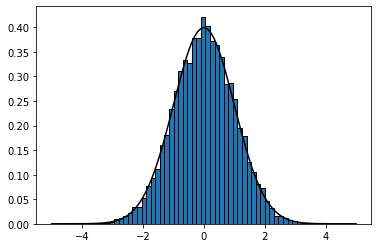

In [49]:
#  Create random samples between zero and one.
u = np.random.rand(10000)

#  Calculate the inverse CDF
v = norm.ppf(u)

#  Plot a histogram of the results and overlay a standard normal on top.
w = np.linspace(-5, 5, 1000)
count, bins, patches = plt.hist(v, bins = 50, density = True, edgecolor = 'black')
plt.plot(w, norm.pdf(w), 'k')

# SPX Data

In [50]:
#  Load in SPX data and calculate the percent change
SPX = pd.read_csv('SPX.csv')
SPX['pct'] = SPX['Close'].pct_change()
pct = SPX['pct'].to_numpy()

(-0.1, 0.1)

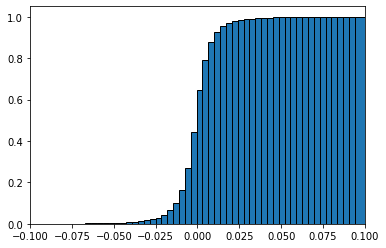

In [51]:
#  Create some custom bins
b = np.arange(-0.2, -0.09, 0.05)
b = np.append(b, np.arange(-0.095, 0.096, 0.0035))
b = np.append(b, np.arange(0.1, 0.21, 0.05))

#  make histogram (cumulative)
count, bins, patches = plt.hist(pct, bins = b, density = True, cumulative = True, edgecolor = 'black')
plt.xlim([-0.1, 0.1])

(-0.075, 0.075)

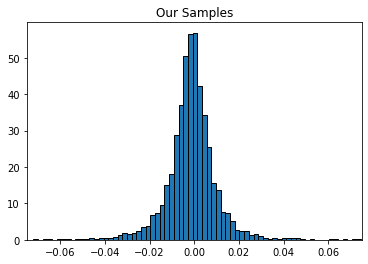

In [52]:
#  Calculate midpoint of all the bins
u = []
for i in range(b.size - 1):
    u.append( (b[i+1] + b[i]) / 2)
    
#  Create random samples between zero and one. Then interpolate to find inverse of CDF
v = np.random.rand(10000)
samples = np.interp(v, count, u)

#  Plot histogram of sampled results
c, b, p = plt.hist(samples, bins = 150, density = True, edgecolor = 'black'); plt.title('Our Samples')
plt.xlim([-0.075, 0.075])

C:\Users\moone\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\moone\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(-0.075, 0.075)

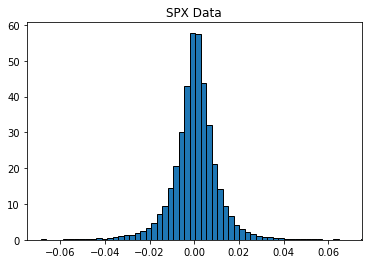

In [41]:
#  To comapre, plot the SPX histogram again
c, b, p = plt.hist(pct, bins = 150, density = True, edgecolor = 'black'); plt.title('SPX Data')
plt.xlim([-0.075, 0.075])